In [2]:
from polygon import RESTClient

# Replace 'your_api_key' with your actual Polygon.io API key
api_key = "UVu97Jw0QqDcmCbK1EGwjXP2I9nhu3cJ"
client = RESTClient(api_key)

# Define parameters
ticker = "SPY"
expiration_date = "2025-01-08"  # Expiration date in YYYY-MM-DD format

# Fetch the option chain
options = client.list_options_contracts(
    underlying_ticker=ticker,
    #expiration_date=expiration_date
)

# Fetch the underlying price
#underlying_quote = client.get_last_quote(ticker)
#underlying_price = (underlying_quote.ask + underlying_quote.bid) / 2  # Midpoint price
underlying_price = 590
# Print the results
print(f"Underlying SPY Price: {underlying_price:.2f}")
print("\nOptions Chain:")
#for option in options:
    #print(f"Symbol: {option.ticker}, Expiration: {option.expiration_date}, Strike: {option.strike_price}")

Underlying SPY Price: 590.00

Options Chain:


In [3]:
from polygon import RESTClient
import datetime

# Replace with your Polygon.io API key
api_key = "your_api_key"
client = RESTClient(api_key)

def fetch_underlying_price(client, ticker, date):
    """Fetch the closing price of the underlying ticker for a given date."""
    try:
        aggs = client.get_aggs(
            ticker=ticker,
            multiplier=1,
            timespan="day",
            from_=date,
            to=date
        )
        if aggs and len(aggs) > 0:
            return aggs[0].close  # Close price of the underlying
        else:
            print(f"No underlying data for {ticker} on {date}")
            return None
    except Exception as e:
        print(f"Error fetching underlying price for {ticker} on {date}: {e}")
        return None

def generate_option_tickers(underlying, expiration, close_price, strike_inc, strike_range):
    """Generate option tickers for a given close price, expiration, and strike range."""
    strikes = range(
        int(close_price - strike_range),
        int(close_price + strike_range) + strike_inc,
        strike_inc
    )
    call_symbols = [f"O:{underlying}{expiration}C{strike * 1000:08d}" for strike in strikes]
    put_symbols = [f"O:{underlying}{expiration}P{strike * 1000:08d}" for strike in strikes]
    return call_symbols + put_symbols

def fetch_option_quotes(client, tickers, date):
    """Fetch all quotes for a list of option tickers."""
    all_quotes = []
    for ticker in tickers:
        try:
            # Use `get_quotes` to fetch all quotes for the ticker
            quotes = client.list_quotes(
                ticker=ticker,
                limit=5000,  # Adjust limit as necessary
                timestamp=date
            )
            for quote in quotes:
                all_quotes.append({
                    "ticker": ticker,
                    "bid_price": quote.bid_price,
                    "ask_price": quote.ask_price,
                    "timestamp": quote.timestamp
                })
        except Exception as e:
            print(f"Error fetching quotes for {ticker}: {e}")
    return all_quotes

# Parameters
underlying_ticker = "SPY"
expiration = "250108"  # Expiration date (YYMMDD format)
day_range = ["2025-01-01", "2025-01-08"]  # Date range for analysis
strike_inc = 5  # Strike increment in dollars
strike_range = 50  # Strike range around the underlying price in dollars

# Main Script
all_quotes = []

for day in day_range:
    print(f"Processing data for {day}...")
    close_price = fetch_underlying_price(client, underlying_ticker, day)
    
    if close_price is not None:
        # Generate option tickers
        option_tickers = generate_option_tickers(
            underlying=underlying_ticker,
            expiration=expiration,
            close_price=close_price,
            strike_inc=strike_inc,
            strike_range=strike_range
        )
        
        # Fetch all quotes for the generated tickers
        quotes = fetch_option_quotes(client, option_tickers, day)
        all_quotes.extend(quotes)

        print(f"Fetched {len(quotes)} quotes for {day}.")

# Print all fetched quotes
for quote in all_quotes:
    print(f"Ticker: {quote['ticker']}, Bid: {quote['bid_price']}, Ask: {quote['ask_price']}, Time: {quote['timestamp']}")

print(f"Total quotes fetched: {len(all_quotes)}")

Processing data for 2025-01-01...
Error fetching underlying price for SPY on 2025-01-01: {"status":"ERROR","request_id":"8c773051e5dce5ad97c71d24332912fe","error":"Unknown API Key"}
Processing data for 2025-01-08...
Error fetching underlying price for SPY on 2025-01-08: {"status":"ERROR","request_id":"66e792df4f013ece47f86df8dbd96e7a","error":"Unknown API Key"}
Total quotes fetched: 0


In [5]:
def create_polygon_symbol(ticker, maturity, strike, option_type):
    """
    Create a Polygon symbol for an option.

    Parameters:
    ticker (str): The ticker symbol of the underlying asset.
    maturity (str): The expiration date of the option in YYYY-MM-DD format.
    strike (float): The strike price of the option.
    option_type (str): The type of the option ('C' for call, 'P' for put).

    Returns:
    str: The Polygon symbol for the option.
    """
    # Convert maturity date to YYMMDD format
    maturity_formatted = maturity[2:].replace("-", "")
    
    # Format the strike price to 8 digits with leading zeros
    strike_formatted = f"{int(strike * 1000):08d}"
    
    # Create the Polygon symbol
    polygon_symbol = f"O:{ticker}{maturity_formatted}{option_type}{strike_formatted}"
    
    return polygon_symbol

# Example usage
ticker = "SPY"
maturity = "2025-01-08"
strike = 610
option_type = "P"  # 'C' for call, 'P' for put
polygon_symbol = create_polygon_symbol(ticker, maturity, strike, option_type)
print(polygon_symbol)

O:SPY250108P00610000


In [7]:
from polygon import RESTClient
import datetime

# Replace with your Polygon.io API key
api_key = "your_api_key"
api_key = "UVu97Jw0QqDcmCbK1EGwjXP2I9nhu3cJ"
client = RESTClient(api_key)

def fetch_underlying_price(client, ticker, date):
    """Fetch the closing price of the underlying ticker for a given date."""
    try:
        aggs = client.get_aggs(
            ticker=ticker,
            multiplier=1,
            timespan="day",
            from_=date,
            to=date
        )
        if aggs and len(aggs) > 0:
            return aggs[0].close  # Close price of the underlying
        else:
            print(f"No underlying data for {ticker} on {date}")
            return None
    except Exception as e:
        print(f"Error fetching underlying price for {ticker} on {date}: {e}")
        return None

def generate_option_tickers(underlying, expiration, close_price, strike_inc, strike_range):
    """Generate option tickers for a given close price, expiration, and strike range."""
    strikes = range(
        int(close_price - strike_range),
        int(close_price + strike_range) + strike_inc,
        strike_inc
    )
    call_symbols = [f"O:{underlying}{expiration}C{strike * 1000:08d}" for strike in strikes]
    put_symbols = [f"O:{underlying}{expiration}P{strike * 1000:08d}" for strike in strikes]
    return call_symbols + put_symbols

def fetch_option_quotes(client, tickers, date):
    """Fetch all quotes for a list of option tickers."""
    all_quotes = []
    for ticker in tickers:
        try:
            # Use `list_quotes` to fetch all quotes for the ticker
            quotes = client.list_quotes(
                ticker=ticker,
                limit=5000,  # Adjust limit as necessary
                timestamp=date
            )
            for quote in quotes:
                all_quotes.append({
                    "ticker": ticker,
                    "bid_price": quote.bid_price,
                    "ask_price": quote.ask_price,
                    "bid_size": quote.bid_size,
                    "ask_size": quote.ask_size,
                    "bid_exchange": quote.bid_exchange,
                    "ask_exchange": quote.ask_exchange,
                    "sequence_number": quote.sequence_number,
                    "timestamp": quote.sip_timestamp
                })
        except Exception as e:
            print(f"Error fetching quotes for {ticker}: {e}")
    return all_quotes

# Parameters
underlying_ticker = "SPY"
expiration = "250108"  # Expiration date (YYMMDD format)
day_range = ["2025-01-01", "2025-01-08"]  # Date range for analysis
strike_inc = 5  # Strike increment in dollars
strike_range = 50  # Strike range around the underlying price in dollars

# Main Script
all_quotes = []

for day in day_range:
    print(f"Processing data for {day}...")
    close_price = fetch_underlying_price(client, underlying_ticker, day)
    
    if close_price is not None:
        print(f"Underlying close price on {day}: {close_price}")
        
        # Generate option tickers
        option_tickers = generate_option_tickers(
            underlying=underlying_ticker,
            expiration=expiration,
            close_price=close_price,
            strike_inc=strike_inc,
            strike_range=strike_range
        )
        
        # Fetch all quotes for the generated tickers
        quotes = fetch_option_quotes(client, option_tickers, day)
        all_quotes.extend(quotes)

        print(f"Fetched {len(quotes)} quotes for {day}.")

# Print all fetched quotes
#for quote in all_quotes:
    #print(f"Ticker: {quote['ticker']}, Bid: {quote['bid_price']}, Ask: {quote['ask_price']}, Time: {quote['timestamp']}")

print(f"Total quotes fetched: {len(all_quotes)}")

Processing data for 2025-01-01...
No underlying data for SPY on 2025-01-01
Processing data for 2025-01-08...
Underlying close price on 2025-01-08: 589.49
Fetched 1268533 quotes for 2025-01-08.
Total quotes fetched: 1268533


In [8]:
quotes
import pandas as pd
pd.DataFrame(quotes)
pd.DataFrame(quotes).to_csv("quotes.csv", index=False)


In [9]:
from datetime import datetime, timezone

def convert_sip_timestamp_to_datetime(sip_timestamp):
    """
    Convert SIP Unix Timestamp (nanoseconds) to a human-readable datetime.
    
    Parameters:
        sip_timestamp (int): SIP Unix Timestamp in nanoseconds.
    
    Returns:
        datetime: Datetime object in UTC.
    """
    # Convert nanoseconds to seconds
    seconds = sip_timestamp / 1_000_000_000
    # Convert to a datetime object
    return datetime.fromtimestamp(seconds, tz=timezone.utc)

# Example SIP Unix Timestamp
sip_timestamp = 1672617600000000000  # Replace with your SIP timestamp
converted_datetime = convert_sip_timestamp_to_datetime(sip_timestamp)

print(f"SIP Timestamp: {sip_timestamp}")
print(f"Converted Datetime: {converted_datetime}")

SIP Timestamp: 1672617600000000000
Converted Datetime: 2023-01-02 00:00:00+00:00


In [10]:
df=pd.DataFrame(quotes)

In [11]:
dt_times = df['timestamp'].apply(convert_sip_timestamp_to_datetime)
df['timestamp2'] = dt_times
max(df['timestamp2'])
min(df['timestamp2'])

Timestamp('2025-01-08 14:30:00.003617+0000', tz='UTC')

In [13]:
import pytz
eastern_tz = pytz.timezone("US/Eastern")
# Convert UTC to US Eastern Time
df_times2= df['timestamp2'].apply(lambda x: x.astimezone(eastern_tz))
df['timestamp3'] = df_times2
min(df['timestamp3'])
df.to_csv("quotes.csv", index=False)

In [1]:
import pandas as pd

def generate_nbbo(df):
    """
    Generate NBBO (National Best Bid and Offer) feed for each ticker individually.
    Ensures quotes are only valid until replaced by a newer quote from the same exchange.
    Stores exchange information for best bid and ask.
    """
    # Sort data by ticker and timestamp
    df = df.sort_values(by=["ticker", "timestamp_est"]).reset_index(drop=True)

    # Store final NBBO output
    nbbo_feed = []

    # Process each ticker separately
    for ticker, ticker_df in df.groupby("ticker"):
        # Tracking best bid/ask per exchange
        bid_quotes = {}  # {exchange: {price, size}}
        ask_quotes = {}  # {exchange: {price, size}}

        # Initialize best bid and ask
        best_bid = None
        best_ask = None

        # Process each row for the current ticker
        for _, row in ticker_df.iterrows():
            exchange_bid = row["bid_exchange"]
            exchange_ask = row["ask_exchange"]
            bid_price = row["bid_price"]
            ask_price = row["ask_price"]
            bid_size = row["bid_size"]
            ask_size = row["ask_size"]
            timestamp = row["timestamp_est"]

            # Update bid quotes per exchange
            bid_quotes[exchange_bid] = {"price": bid_price, "size": bid_size}
            ask_quotes[exchange_ask] = {"price": ask_price, "size": ask_size}

            # Determine best bid
            if bid_quotes:
                best_bid_exchange, best_bid = max(bid_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_bid_exchange, best_bid = None, None

            # Determine best ask
            if ask_quotes:
                best_ask_exchange, best_ask = min(ask_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_ask_exchange, best_ask = None, None

            # Store NBBO only if both bid and ask exist
            if best_bid and best_ask:
                nbbo_feed.append({
                    "timestamp_est": timestamp,
                    "ticker": ticker,
                    "best_bid_price": best_bid["price"],
                    "best_bid_size": best_bid["size"],
                    "best_bid_exchange": best_bid_exchange,
                    "best_ask_price": best_ask["price"],
                    "best_ask_size": best_ask["size"],
                    "best_ask_exchange": best_ask_exchange
                })

    # Convert to DataFrame
    nbbo_df = pd.DataFrame(nbbo_feed)
    return nbbo_df

# Load input CSV
df = pd.read_csv("quotes.csv")

# Generate NBBO feed
nbbo_df = generate_nbbo(df)

# Save NBBO feed
nbbo_df.to_csv("nbbo_feed.csv", index=False)


ModuleNotFoundError: No module named 'ace_tools'

In [3]:
import pandas as pd

# Load NBBO feed data
df = pd.read_csv("nbbo_feed.csv")

# Convert timestamp to datetime format
df["timestamp_est"] = pd.to_datetime(df["timestamp_est"])

# Round timestamps to the nearest minute
df["minute"] = df["timestamp_est"].dt.floor("T")  # 'T' stands for minute

# Group by ticker and minute
snapshot_df = df.groupby(["ticker", "minute"]).agg(
    best_bid_price=("best_bid_price", "last"),  # Last bid price of the minute
    best_bid_size=("best_bid_size", "last"),    # Last bid size
    best_bid_exchange=("best_bid_exchange", "last"),  # Exchange providing last bid
    best_ask_price=("best_ask_price", "last"),  # Last ask price of the minute
    best_ask_size=("best_ask_size", "last"),    # Last ask size
    best_ask_exchange=("best_ask_exchange", "last")  # Exchange providing last ask
).reset_index()

# Save to CSV
snapshot_df.to_csv("nbbo_1min_snapshot.csv", index=False)

In [2]:
import pandas as pd
df=pd.read_csv("merged_data/merged_opt_1m_2025-01-02.csv")

In [114]:
tickers=df['ticker'].unique()

groups=df.groupby('ticker')
df1=groups.get_group(tickers[19])


In [115]:
tickers

array(['O:SPY250102C00554000', 'O:SPY250102C00559000',
       'O:SPY250102C00564000', 'O:SPY250102C00569000',
       'O:SPY250102C00574000', 'O:SPY250102C00579000',
       'O:SPY250102C00584000', 'O:SPY250102C00589000',
       'O:SPY250102C00594000', 'O:SPY250102C00599000',
       'O:SPY250102C00604000', 'O:SPY250102C00609000',
       'O:SPY250102C00614000', 'O:SPY250102P00554000',
       'O:SPY250102P00559000', 'O:SPY250102P00564000',
       'O:SPY250102P00569000', 'O:SPY250102P00574000',
       'O:SPY250102P00579000', 'O:SPY250102P00584000',
       'O:SPY250102P00589000', 'O:SPY250102P00594000',
       'O:SPY250102P00599000', 'O:SPY250102P00604000',
       'O:SPY250102P00609000', 'O:SPY250102P00614000'], dtype=object)

In [116]:
import copy
df1=copy.deepcopy(df1)
df1["timestamp_est"] = pd.to_datetime(df1["timestamp_est"])
df1["time1"] = df1["timestamp_est"].dt.time

In [117]:
#df1["time1"]=map(str,df1["time1"])
df1["time_str"]=df1["time1"].apply(lambda x: x.strftime('%H:%M:%S'))

In [118]:
df1.sort_values(by="time1",inplace=True)

In [3]:
def generate_nbbo(df):
    """
    Generate NBBO (National Best Bid and Offer) feed for each ticker individually.
    Ensures quotes are only valid until replaced by a newer quote from the same exchange.
    Stores exchange information for best bid and ask.
    """
    # Sort data by ticker and timestamp
    df = df.sort_values(by=["ticker", "timestamp_est"]).reset_index(drop=True)

    # Store final NBBO output
    nbbo_feed = []

    # Process each ticker separately
    for ticker, ticker_df in df.groupby("ticker"):
        # Tracking best bid/ask per exchange
        bid_quotes = {}  # {exchange: {price, size}}
        ask_quotes = {}  # {exchange: {price, size}}

        # Initialize best bid and ask
        best_bid = None
        best_ask = None

        # Process each row for the current ticker
        for _, row in ticker_df.iterrows():
            exchange_bid = row["bid_exchange"]
            exchange_ask = row["ask_exchange"]
            bid_price = row["bid_price"]
            ask_price = row["ask_price"]
            bid_size = row["bid_size"]
            ask_size = row["ask_size"]
            timestamp = row["timestamp_est"]

            # Update bid quotes per exchange
            bid_quotes[exchange_bid] = {"price": bid_price, "size": bid_size, "timestamp": timestamp}
            ask_quotes[exchange_ask] = {"price": ask_price, "size": ask_size, "timestamp": timestamp}

            # Determine best bid
            if bid_quotes:
                best_bid_exchange, best_bid = max(bid_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_bid_exchange, best_bid = None, None

            # Determine best ask
            if ask_quotes:
                best_ask_exchange, best_ask = min(ask_quotes.items(), key=lambda x: x[1]["price"])
            else:
                best_ask_exchange, best_ask = None, None

            out_dict={
                "timestamp_est": timestamp,
                "ticker": ticker,
                "best_bid_price": best_bid["price"],
                "best_bid_size": best_bid["size"],
                "best_bid_exchange": best_bid_exchange,
                "best_ask_price": best_ask["price"],
                "best_ask_size": best_ask["size"],
                "best_ask_exchange": best_ask_exchange
            }
            dict_bids=bid_quotes.copy()
            dict_asks=ask_quotes.copy()
            out_dict["bids"]=dict_bids
            out_dict["asks"]=dict_asks
            

            # Store NBBO only if both bid and ask exist
            if best_bid and best_ask:
                nbbo_feed.append(out_dict)


    # Convert to DataFrame
    nbbo_df = pd.DataFrame(nbbo_feed)
    return nbbo_df

In [4]:
df_quotes=pd.read_csv("data/daily_quotes_2025-01-02.csv")
df_nbbo=generate_nbbo(df_quotes)

In [29]:
df_nbbo[df_nbbo["ticker"]==tickers[7]]
df_small=df_nbbo[df_nbbo["ticker"]==tickers[7]]

# Expand the 'bids' and 'asks' columns which are dictionaries
bids_df = df_small["bids"].apply(pd.Series)
asks_df = df_small["asks"].apply(pd.Series)

# Rename columns to avoid conflicts
bids_df = bids_df.add_prefix("bid_")
asks_df = asks_df.add_prefix("ask_")

# Concatenate the original dataframe with the expanded columns
df_expanded = pd.concat([df_small, bids_df, asks_df], axis=1)

# Drop the original 'bids' and 'asks' columns
df_expanded.drop(columns=["bids", "asks"], inplace=True)

df_expanded

,timestamp_est,ticker,best_bid_price,best_bid_size,best_bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,bid_309,bid_307,...,ask_325,ask_308,ask_300,ask_318,ask_302,ask_322,ask_301,ask_304,ask_316,ask_323
501046,2025-01-02 09:30:00.245682-05:00,O:SPY250102C00589000,1.78,1,309,2.53,1,309,"{'price': 1.78, 'size': 1, 'timestamp': '2025-...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501047,2025-01-02 09:30:00.323689-05:00,O:SPY250102C00589000,0.00,0,309,5.00,9,309,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501048,2025-01-02 09:30:00.345271-05:00,O:SPY250102C00589000,1.73,8,307,2.37,34,307,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501049,2025-01-02 09:30:00.346238-05:00,O:SPY250102C00589000,2.08,39,319,2.14,39,319,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501050,2025-01-02 09:30:00.694464-05:00,O:SPY250102C00589000,2.08,39,319,1.96,39,319,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634876,2025-01-02 15:54:11.338565-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 4343, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634877,2025-01-02 15:55:01.920095-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634878,2025-01-02 15:55:11.745425-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, 'timestamp': '20...","{'price': 0.05, 'size': 1, 'timestamp': '2025-...","{'price': 0.02, 'size': 3784, 'timestamp': '20...","{'price': 0.01, 'size': 3962, 'timestamp': '20...","{'price': 0.02, 'size': 2439, 'timestamp': '20..."
634879,2025-01-02 15:56:04.401771-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{'price': 0.03, 'size': 1153, 'timestamp': '20...","{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",...,"{'price': 0.02, 'size': 1871, 'timestamp': '20...","{'price': 0.01, 'size': 3853, 'timestamp': '20...","{'price': 0.01, 'size': 2239, 'timestamp': '20...","{'price': 0.72, 'size': 36, 'timestamp': '2025...","{'price': 0.02, 'size': 3841, 'timestamp': '20...","{'price': 0.02, 'size': 1057, '

In [32]:
import copy
bids_df2=copy.deepcopy(bids_df)
bids_df2=pd.concat([bids_df2, asks_df], axis=1)
df_new=copy.deepcopy(bids_df2)
for col in bids_df2.columns:
    print(f"col={col}\n")
    a=bids_df2[col].apply(pd.Series).add_prefix("unroll_")
    a=a.add_prefix(col+"_")
    df_new = pd.concat([df_new, a], axis=1)
df_markets=pd.concat([df_small, df_new], axis=1)
df_markets

col=bid_309

col=bid_307

col=bid_319

col=bid_320

col=bid_318

col=bid_312

col=bid_303

col=bid_315

col=bid_323

col=bid_316

col=bid_313

col=bid_301

col=bid_325

col=bid_308

col=bid_300

col=bid_302

col=bid_322

col=bid_304

col=ask_309

col=ask_307

col=ask_319

col=ask_320

col=ask_312

col=ask_303

col=ask_315

col=ask_313

col=ask_325

col=ask_308

col=ask_300

col=ask_318

col=ask_302

col=ask_322

col=ask_301

col=ask_304

col=ask_316

col=ask_323



,timestamp_est,ticker,best_bid_price,best_bid_size,best_bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,bids,asks,...,ask_304_unroll_size,ask_304_unroll_timestamp,ask_316_unroll_0,ask_316_unroll_price,ask_316_unroll_size,ask_316_unroll_timestamp,ask_323_unroll_0,ask_323_unroll_price,ask_323_unroll_size,ask_323_unroll_timestamp
501046,2025-01-02 09:30:00.245682-05:00,O:SPY250102C00589000,1.78,1,309,2.53,1,309,"{309: {'price': 1.78, 'size': 1, 'timestamp': ...","{309: {'price': 2.53, 'size': 1, 'timestamp': ...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501047,2025-01-02 09:30:00.323689-05:00,O:SPY250102C00589000,0.00,0,309,5.00,9,309,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501048,2025-01-02 09:30:00.345271-05:00,O:SPY250102C00589000,1.73,8,307,2.37,34,307,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501049,2025-01-02 09:30:00.346238-05:00,O:SPY250102C00589000,2.08,39,319,2.14,39,319,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501050,2025-01-02 09:30:00.694464-05:00,O:SPY250102C00589000,2.08,39,319,1.96,39,319,"{309: {'price': 0.0, 'size': 0, 'timestamp': '...","{309: {'price': 5.0, 'size': 9, 'timestamp': '...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634876,2025-01-02 15:54:11.338565-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634877,2025-01-02 15:55:01.920095-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634878,2025-01-02 15:55:11.745425-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,3962.0,2025-01-02 15:54:05.468676-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00
634879,2025-01-02 15:56:04.401771-05:00,O:SPY250102C00589000,0.03,1153,309,0.01,90,307,"{309: {'price': 0.03, 'size': 1153, 'timestamp...","{309: {'price': 0.02, 'size': 1492, 'timestamp...",...,3784.0,2025-01-02 15:28:38.259060-05:00,NaN,0.01,4310.0,2025-01-02 15:56:04.401771-05:00,NaN,0.02,2439.0,2025-01-02 14:53:34.498565-05:00


In [ ]:
# Convert timestamp to datetime format if not already done
df_markets["timestamp_est"] = pd.to_datetime(df_markets["timestamp_est"])

# Round timestamps to the nearest minute
df_markets["minute"] = df_markets["timestamp_est"].dt.floor("T")  # 'T' stands for minute

# Group by ticker and minute, and keep the last entry for each group
snapshot_df = df_markets.groupby(["ticker", "minute"]).last().reset_index()

# Drop the 'minute' column as it's no longer needed
snapshot_df.drop(columns=["minute"], inplace=True)

# Save the snapshot to a CSV file
snapshot_df.to_csv("df_markets_1min_snapshot.csv", index=False)

# Display the snapshot dataframe
print(snapshot_df)

                   ticker                    timestamp_est  best_bid_price  \
0    O:SPY250102C00589000 2025-01-02 09:30:59.769131-05:00            2.07   
1    O:SPY250102C00589000 2025-01-02 09:31:59.988953-05:00            2.12   
2    O:SPY250102C00589000 2025-01-02 09:32:59.648118-05:00            2.11   
3    O:SPY250102C00589000 2025-01-02 09:33:59.881467-05:00            2.03   
4    O:SPY250102C00589000 2025-01-02 09:34:59.916356-05:00            1.65   
..                    ...                              ...             ...   
368  O:SPY250102C00589000 2025-01-02 15:53:42.891284-05:00            0.03   
369  O:SPY250102C00589000 2025-01-02 15:54:11.338565-05:00            0.03   
370  O:SPY250102C00589000 2025-01-02 15:55:11.745425-05:00            0.03   
371  O:SPY250102C00589000 2025-01-02 15:56:04.401771-05:00            0.03   
372  O:SPY250102C00589000 2025-01-02 15:57:22.110761-05:00            0.03   

     best_bid_size  best_bid_exchange  best_ask_price  best_ask

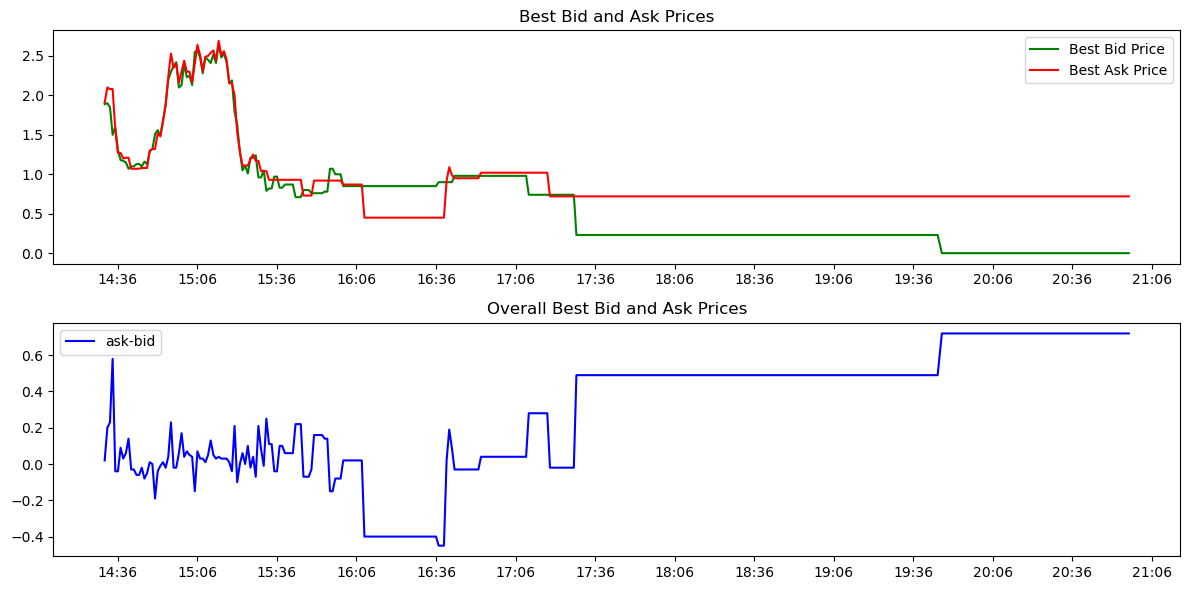

In [72]:
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["best_bid_price"])
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["best_ask_price"])
#plt.plot(snapshot_df["timestamp_est"], snapshot_df["ask_316_unroll_price"])
import matplotlib.dates as mdates
exchange_num=318
plt.figure(figsize=(12, 6))

exch_ask_col = f"ask_{exchange_num}_unroll_price"
exch_bid_col = f"bid_{exchange_num}_unroll_price"

# First plot
ax = plt.subplot(2, 1, 1)
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Show every 5 minutes

plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_bid_col], label="Best Bid Price", color='green')
plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_ask_col], label="Best Ask Price", color='red')
plt.title("Best Bid and Ask Prices")
plt.legend()
diff_col = snapshot_df[exch_ask_col]-snapshot_df[exch_bid_col]

# Second plot
ax=plt.subplot(2, 1, 2)
plt.plot(snapshot_df["timestamp_est"], diff_col, label="ask-bid", color='blue')
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))  # Show every 5 minutes
plt.title("Overall Best Bid and Ask Prices")
plt.legend()

plt.tight_layout()
plt.show()

#plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_bid_col], label="best_bid_price",color='green')
#plt.plot(snapshot_df["timestamp_est"], snapshot_df[exch_ask_col], label="best_ask_price",color='red')





In [33]:
df_markets.to_csv("df_markets.csv", index=False)

In [36]:
plt.plot(df_markets["timestamp_est"], df_markets["best_bid_price"], label="Best Bid Price")

Error in callback <function flush_figures at 0x3a4239a80> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import copy
bids_df2=copy.deepcopy(bids_df)
bids_df2["bid_309"].apply(pd.Series)
bids_df2["bid_309"].apply(pd.Series).add_prefix("bid_309_")

,bid_309_price,bid_309_size,bid_309_timestamp
501047,0.0,0,2025-01-02 09:30:00.323689-05:00
501048,0.0,0,2025-01-02 09:30:00.323689-05:00
501049,0.0,0,2025-01-02 09:30:00.323689-05:00
501050,0.0,0,2025-01-02 09:30:00.323689-05:00
501051,0.0,0,2025-01-02 09:30:00.323689-05:00
501052,0.0,0,2025-01-02 09:30:00.323689-05:00
501053,0.0,0,2025-01-02 09:30:00.323689-05:00
501054,0.0,0,2025-01-02 09:30:00.323689-05:00
501055,0.0,0,2025-01-02 09:30:00.323689-05:00


In [141]:
bids_df

,bid_309,bid_307,bid_319,bid_320,bid_318
501047,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...",NaN,NaN,NaN,NaN
501048,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...",NaN,NaN,NaN
501049,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 2.08, 'size': 39, 'timestamp': '2025...",NaN,NaN
501050,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 2.08, 'size': 39, 'timestamp': '2025...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501051,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501052,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...",NaN
501053,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.91, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."
501054,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.9, 'size': 39, 'timestamp': '2025-...","{'price': 1.86, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."
501055,"{'price': 0.0, 'size': 0, 'timestamp': '2025-0...","{'price': 1.73, 'size': 8, 'timestamp': '2025-...","{'price': 1.86, 'size': 39, 'timestamp': '2025...","{'price': 1.86, 'size': 58, 'timestamp': '2025...","{'price': 1.88, 'size': 6, 'timestamp': '2025-..."


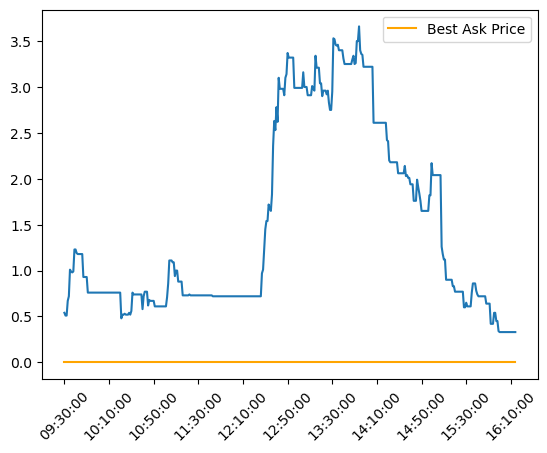

In [120]:
import matplotlib.pyplot as plt
ax=plt.plot(df1["time_str"], df1['best_bid_price'])
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=len(df1["time_str"]) // 30))
plt.plot(df1["time_str"], df1['best_ask_price'], label='Best Ask Price', color='orange')
plt.legend()
plt.show()

df1.to_csv("test.csv", index=False)

In [1]:
import pandas as pd
df_allq=pd.read_csv("data/daily_quotes_1d_2025-01-02.csv")
df_allq["timestamp_est"] = pd.to_datetime(df_allq["timestamp_est"])

In [2]:
tickers=df_allq['ticker'].unique()


In [3]:
def create_snapshot(df):
    """
    Create a snapshot of the NBBO feed at each minute.
    """
    # Round timestamps to the nearest minute
    #df["minute"] = df["timestamp_est"].dt.floor("T")  # 'T' stands for minute

    # Group by ticker and minute
    snapshot_df = df.groupby(["ticker", "minute"]).agg(
        bid_price=("bid_price", "last"),  # Last bid price of the minute
        bid_size=("bid_size", "last"),    # Last bid size
        bid_exchange=("bid_exchange", "last"),  # Exchange providing last bid
        best_ask_price=("ask_price", "last"),  # Last ask price of the minute
        best_ask_size=("ask_size", "last"),    # Last ask size
        best_ask_exchange=("ask_exchange", "last")  # Exchange providing last ask
    ).reset_index()

    return snapshot_df

def parse_option_ticker(ticker):
    """
    Parse an option ticker to extract the underlying, expiration, strike, and option type.

    Parameters:
    ticker (str): The option ticker symbol.

    Returns:
    dict: A dictionary containing the underlying, expiration, strike, and option type.
    """
    # Remove the "O:" prefix
    ticker = ticker[2:]

    # Extract the underlying
    underlying = ticker[:-15]

    # Extract the expiration date in YYMMDD format
    expiration = ticker[-15:-9]

    # Extract the option type ('C' for call, 'P' for put)
    option_type = ticker[-9]

    # Extract the strike price (divide by 1000 to get the original strike price)
    strike = int(ticker[-8:]) / 1000

    return {
        "underlying": underlying,
        "expiration": expiration,
        "strike": strike,
        "option_type": option_type
    }


# Load NBBO feed 
all_snapshots = []

for ticker in tickers:
    df_allq["minute"] = df_allq["timestamp_est"].dt.floor("T")  # 'T' stands for minute
    df_ticker = df_allq[df_allq["ticker"] == ticker]
    df_snap = create_snapshot(df_ticker)
    all_snapshots.append(df_snap)

# Combine all snapshots into one DataFrame
df_combined_snapshots = pd.concat(all_snapshots, ignore_index=True)

df_combined_snapshots[['underlying', 'expiration', 'strike', 'option_type']] = df_combined_snapshots['ticker'].apply(
    lambda x: pd.Series(parse_option_ticker(x))
)


df_combined_snapshots.to_csv("combined_snapshots.csv", index=False)

In [109]:
import pandas as pd
import copy

# Sample DataFrame
data = {
    "ticker": ["O:SPY250102C00554000", "O:SPY250102C00554000", "O:SPY250102C00554000",
               "O:SPY250102P00554000", "O:SPY250102P00554000", "O:SPY250102P00554000"],
    "minute": ["2025-01-02 09:30:00-05:00", "2025-01-02 09:31:00-05:00", "2025-01-02 09:32:00-05:00",
               "2025-01-02 09:30:00-05:00", "2025-01-02 09:31:00-05:00", "2025-01-02 09:32:00-05:00"],
    "bid_price": [34.93, 34.65, 34.89, 5.10, 5.05, 5.20],
    "best_ask_price": [35.91, 36.13, 36.71, 5.50, 5.55, 5.40],
    "underlying": ["SPY"] * 6,
    "expiration": ["250102"] * 6,
    "strike": [554.0] * 6,
    "option_type": ["C", "C", "C", "P", "P", "P"]
}

df_test = pd.DataFrame(data)

# Convert minute column to datetime
df_test["minute"] = pd.to_datetime(df["minute"])

# Compute mid-price
df_test["mid_price"] = (df_test["bid_price"] + df_test["best_ask_price"]) / 2

# Pivot data to get calls and puts in the same row
df_pivot = df_test.pivot_table(index=["minute", "strike"], columns="option_type", values="mid_price").reset_index()

# Rename columns for clarity
df_pivot.columns = ["minute", "strike", "call_price", "put_price"]

# Compute C - P + Strike
df_pivot["put_call_parity"] = df_pivot["call_price"] - df_pivot["put_price"] + df_pivot["strike"]

df_pivot

df_test["delta_sign"]=df_test["option_type"].apply(lambda x: 1 if x=="C" else -1)

dfg_groups=df_test.groupby(["strike", "minute"])
for name, group in dfg_groups:
    strike, minute = name
    impl_spot = (group["mid_price"]*group["delta_sign"]).mean()+strike
    #print(strike,impl_spot)
    #print(group)


def compute_put_call_parity(df):
    df=copy.deepcopy(df)
    # Assign +1 for Calls, -1 for Puts
    df["delta_sign"] = df["option_type"].map({"C": 1, "P": -1})
    df["bid_contrib"]=df.apply(lambda x: x["bid_price"] if x["delta_sign"]==1 else x["best_ask_price"], axis=1)
    df["ask_contrib"]=df.apply(lambda x: x["best_ask_price"] if x["delta_sign"]==1 else x["bid_price"], axis=1)

    #df["bid_contrib"]=df["bid_price"] if df["delta_sign"]==1 else df["best_ask_price"]
    #df["ask_contrib"]=df["best_ask_price"] if df["delta_sign"]==1 else df["bid_price"]


    # Efficient groupby apply method
    df_parity = df.groupby(["strike", "minute"]).apply(
        lambda group: pd.Series({
            "put_call_parity": (group["mid_price"] * group["delta_sign"]).sum() + group["strike"].iloc[0],
            "bid_parity": (group["bid_contrib"] * group["delta_sign"]).sum() + group["strike"].iloc[0],
            "ask_parity": (group["ask_contrib"] * group["delta_sign"]).sum() + group["strike"].iloc[0]
        })
    ).reset_index()
    return df_parity

df_combined_snapshots["mid_price"] = (df_combined_snapshots["bid_price"] + df_combined_snapshots["best_ask_price"]) / 2
#df_parity = compute_put_call_parity(df_combined_snapshots)
df_parity=compute_put_call_parity(df_combined_snapshots)
df_parity

,strike,minute,put_call_parity,bid_parity,ask_parity
0,554.0,2025-01-02 09:30:00-05:00,589.415,588.92,589.91
1,554.0,2025-01-02 09:31:00-05:00,589.390,588.65,590.13
2,554.0,2025-01-02 09:32:00-05:00,589.800,588.89,590.71
3,554.0,2025-01-02 09:33:00-05:00,589.150,588.54,589.76
4,554.0,2025-01-02 09:34:00-05:00,587.950,587.33,588.57
...,...,...,...,...,...
23862,614.0,2025-01-02 16:10:00-05:00,585.015,584.40,585.63
23863,614.0,2025-01-02 16:11:00-05:00,584.915,584.30,585.53
23864,614.0,2025-01-02 16:12:00-05:00,584.950,584.34,585.56
23865,614.0,2025-01-02 16:13:00-05:00,584.945,584.33,585.56


In [ ]:
a=4
b = 1 if a == 5 else 2

SyntaxError: invalid syntax (1307811696.py, line 2)

Weighted Average Spot (Distance): 585.6961750623676
Weighted Average Spot (Spread): 585.7064370725227
Combined Weighted Average Spot: 585.7013060674451


/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_49151/629312363.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)


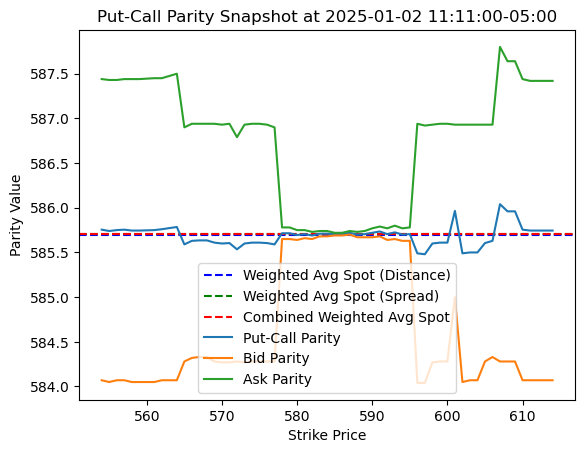

In [118]:
import matplotlib.pyplot as plt
minute=df_parity["minute"].iloc[100]
parity_snapshot = df_parity[df_parity["minute"] == minute]
# Calculate the weighted average of the implied spot based on the distance from spot to strike
# Calculate the weighted average of the implied spot based on the distance from spot to strike
parity_snapshot["distance_weight"] = 1 / (abs(parity_snapshot["put_call_parity"] - parity_snapshot["strike"]) + 1e-6)
weighted_avg_spot_distance = (parity_snapshot["put_call_parity"] * parity_snapshot["distance_weight"]).sum() / parity_snapshot["distance_weight"].sum()

# Calculate the weighted average of the implied spot based on the bid-ask spread
df_parity["spread_weight"] = 1 / (parity_snapshot["ask_parity"] - parity_snapshot["bid_parity"])
weighted_avg_spot_spread = (parity_snapshot["put_call_parity"] * parity_snapshot["spread_weight"]).sum() / parity_snapshot["spread_weight"].sum()

# Combine the two weighted averages to get a better estimate of the implied spot
combined_weighted_avg_spot = (weighted_avg_spot_distance + weighted_avg_spot_spread) / 2
print(f"Weighted Average Spot (Distance): {weighted_avg_spot_distance}")
print(f"Weighted Average Spot (Spread): {weighted_avg_spot_spread}")
print(f"Combined Weighted Average Spot: {combined_weighted_avg_spot}")

# Add horizontal lines for the weighted averages
plt.axhline(y=weighted_avg_spot_distance, color='blue', linestyle='--', label='Weighted Avg Spot (Distance)')
plt.axhline(y=weighted_avg_spot_spread, color='green', linestyle='--', label='Weighted Avg Spot (Spread)')
plt.axhline(y=combined_weighted_avg_spot, color='red', linestyle='--', label='Combined Weighted Avg Spot')
parity_snapshot = df_parity[df_parity["minute"] == minute]

plt.plot(parity_snapshot["strike"], parity_snapshot["put_call_parity"], label="Put-Call Parity")
plt.plot(parity_snapshot["strike"], parity_snapshot["bid_parity"], label="Bid Parity")
plt.plot(parity_snapshot["strike"], parity_snapshot["ask_parity"], label="Ask Parity")
plt.xlabel("Strike Price")
plt.ylabel("Parity Value")
plt.title(f"Put-Call Parity Snapshot at {minute}")
plt.legend()
plt.show()

In [115]:
df_parity["distance_weight"]

0        0.028237
1        0.028257
2        0.027933
3        0.028450
4        0.029455
           ...   
23862    0.034501
23863    0.034382
23864    0.034423
23865    0.034417
23866    0.034358
Name: distance_weight, Length: 23867, dtype: float64

to do.
1. find weighted average of the implied spot based on the distance from spot to strike.
2. find the weighted average of the implied spot based on the bid ask spread
3. see if there is a way to combine the two weighted averages to get a better estimate of the implied spot.


In [5]:
import pytz
from datetime import datetime

#df_combined_snapshots["minute"]
def create_4pm_datetime(localized_datetime):
    """
    Create a localized 4pm datetime on the same date as the input datetime.
    
    Parameters:
        localized_datetime (datetime): The input localized datetime.
    
    Returns:
        datetime: A localized datetime set to 4pm on the same date.
    """
    # Extract the date part of the input datetime
    date_part = localized_datetime.date()
    
    # Create a new datetime object for 4pm on the same date
    four_pm = datetime(date_part.year, date_part.month, date_part.day, 16, 17, 0)
    
    # Localize the new datetime object to the same timezone as the input datetime
    localized_four_pm = localized_datetime.tzinfo.localize(four_pm)
    
    return localized_four_pm

# Example usage
input_datetime = df_combined_snapshots["minute"].iloc[0]
localized_4pm = create_4pm_datetime(input_datetime)
print(localized_4pm)

2025-01-02 16:17:00-05:00


In [6]:
df_underlying = pd.read_csv("data/SPY_1m_2025-01-02.csv")
df_underlying["timestamp_est"] = pd.to_datetime(df_underlying["timestamp_est"])
df_underlying["minute"] = df_underlying["timestamp_est"].dt.floor("T")
df_result=pd.merge(df_combined_snapshots, df_underlying, on="minute", how="left")
df_result

,ticker,minute,bid_price,bid_size,bid_exchange,best_ask_price,best_ask_size,best_ask_exchange,underlying,expiration,...,high_price,low_price,close_price,volume,vwap,timestamp,transactions,otc,timestamp_utc,timestamp_est
0,O:SPY250102C00554000,2025-01-02 09:30:00-05:00,34.93,1,309,35.91,1,309,SPY,250102,...,589.45,588.4600,589.45,1286903.0,588.9191,1735828200000,16412,NaN,2025-01-02 14:30:00+00:00,2025-01-02 09:30:00-05:00
1,O:SPY250102C00554000,2025-01-02 09:31:00-05:00,34.65,1,301,36.13,5,301,SPY,250102,...,589.60,589.0400,589.57,175662.0,589.3385,1735828260000,2160,NaN,2025-01-02 14:31:00+00:00,2025-01-02 09:31:00-05:00
2,O:SPY250102C00554000,2025-01-02 09:32:00-05:00,34.89,5,301,36.71,6,313,SPY,250102,...,589.65,589.0319,589.09,125032.0,589.3655,1735828320000,1542,NaN,2025-01-02 14:32:00+00:00,2025-01-02 09:32:00-05:00
3,O:SPY250102C00554000,2025-01-02 09:33:00-05:00,34.54,1,313,35.76,6,313,SPY,250102,...,589.18,587.9800,588.01,132101.0,588.6081,1735828380000,2396,NaN,2025-01-02 14:33:00+00:00,2025-01-02 09:33:00-05:00
4,O:SPY250102C00554000,2025-01-02 09:34:00-05:00,33.33,1,313,34.57,1,313,SPY,250102,...,588.52,587.8100,587.83,145261.0,588.1590,1735828440000,1916,NaN,2025-01-02 14:34:00+00:00,2025-01-02 09:34:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34736,O:SPY250102P00614000,2025-01-02 16:10:00-05:00,28.37,60,300,29.60,50,300,SPY,250102,...,585.07,584.8200,584.94,184134.0,584.9587,1735852200000,486,NaN,2025-01-02 21:10:00+00:00,2025-01-02 16:10:00-05:00
34737,O:SPY250102P00614000,2025-01-02 16:11:00-05:00,28.47,60,300,29.70,50,300,SPY,250102,...,584.96,584.8800,584.95,149781.0,585.6731,1735852260000,154,NaN,2025-01-02 21:11:00+00:00,2025-01-02 16:11:00-05:00
34738,O:SPY250102P00614000,2025-01-02 16:12:00-05:00,28.44,20,300,29.66,10,300,SPY,250102,...,584.99,584.9100,584.93,11420.0,584.9308,1735852320000,85,NaN,2025-01-02 21:12:00+00:00,2025-01-02 16:12:00-05:00
34739,O:SPY250102P00614000,2025-01-02 16:13:00-05:00,28.44,50,300,29.67,60,300,SPY,250102,...,584.97,584.9000,584.90,1558824.0,584.5036,1735852380000,62,NaN,2025-01-02 21:13:00+00:00,2025-01-02 16:13:00-05:00


In [59]:
df=df_result
df["texp"]=localized_4pm-df["minute"]
#df["texp_years"]=df_combined_snapshots["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df_combined_snapshots["texp_years"]*(14.0/7.0)

df["texp_years"]=df["texp"].dt.total_seconds()/31557600
#df["texp_years"]=df["texp_years"]*(14.0/7.0)

import py_vollib.black_scholes_merton.implied_volatility
import py_vollib_vectorized
flag=df["option_type"].apply(lambda x: "c" if x=="C" else "p")
strike=df["strike"]
f=df["bid_price"]
f_ask=df["best_ask_price"]
s=df["close_price"]
t=df["texp_years"]
r=0.0000001
bid_iv=py_vollib_vectorized.vectorized_implied_volatility(f, s, strike, t, r,flag)
ask_iv=py_vollib_vectorized.vectorized_implied_volatility(f_ask, s, strike, t, r,flag)
df["bid_iv"]=bid_iv
df["ask_iv"]=ask_iv
df["mid_iv"]=(df["bid_iv"]+df["ask_iv"])/2

/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/py_vollib_vectorized/implied_volatility.py:75: UserWarning: Found Below Intrinsic contracts at index [0, 1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 19

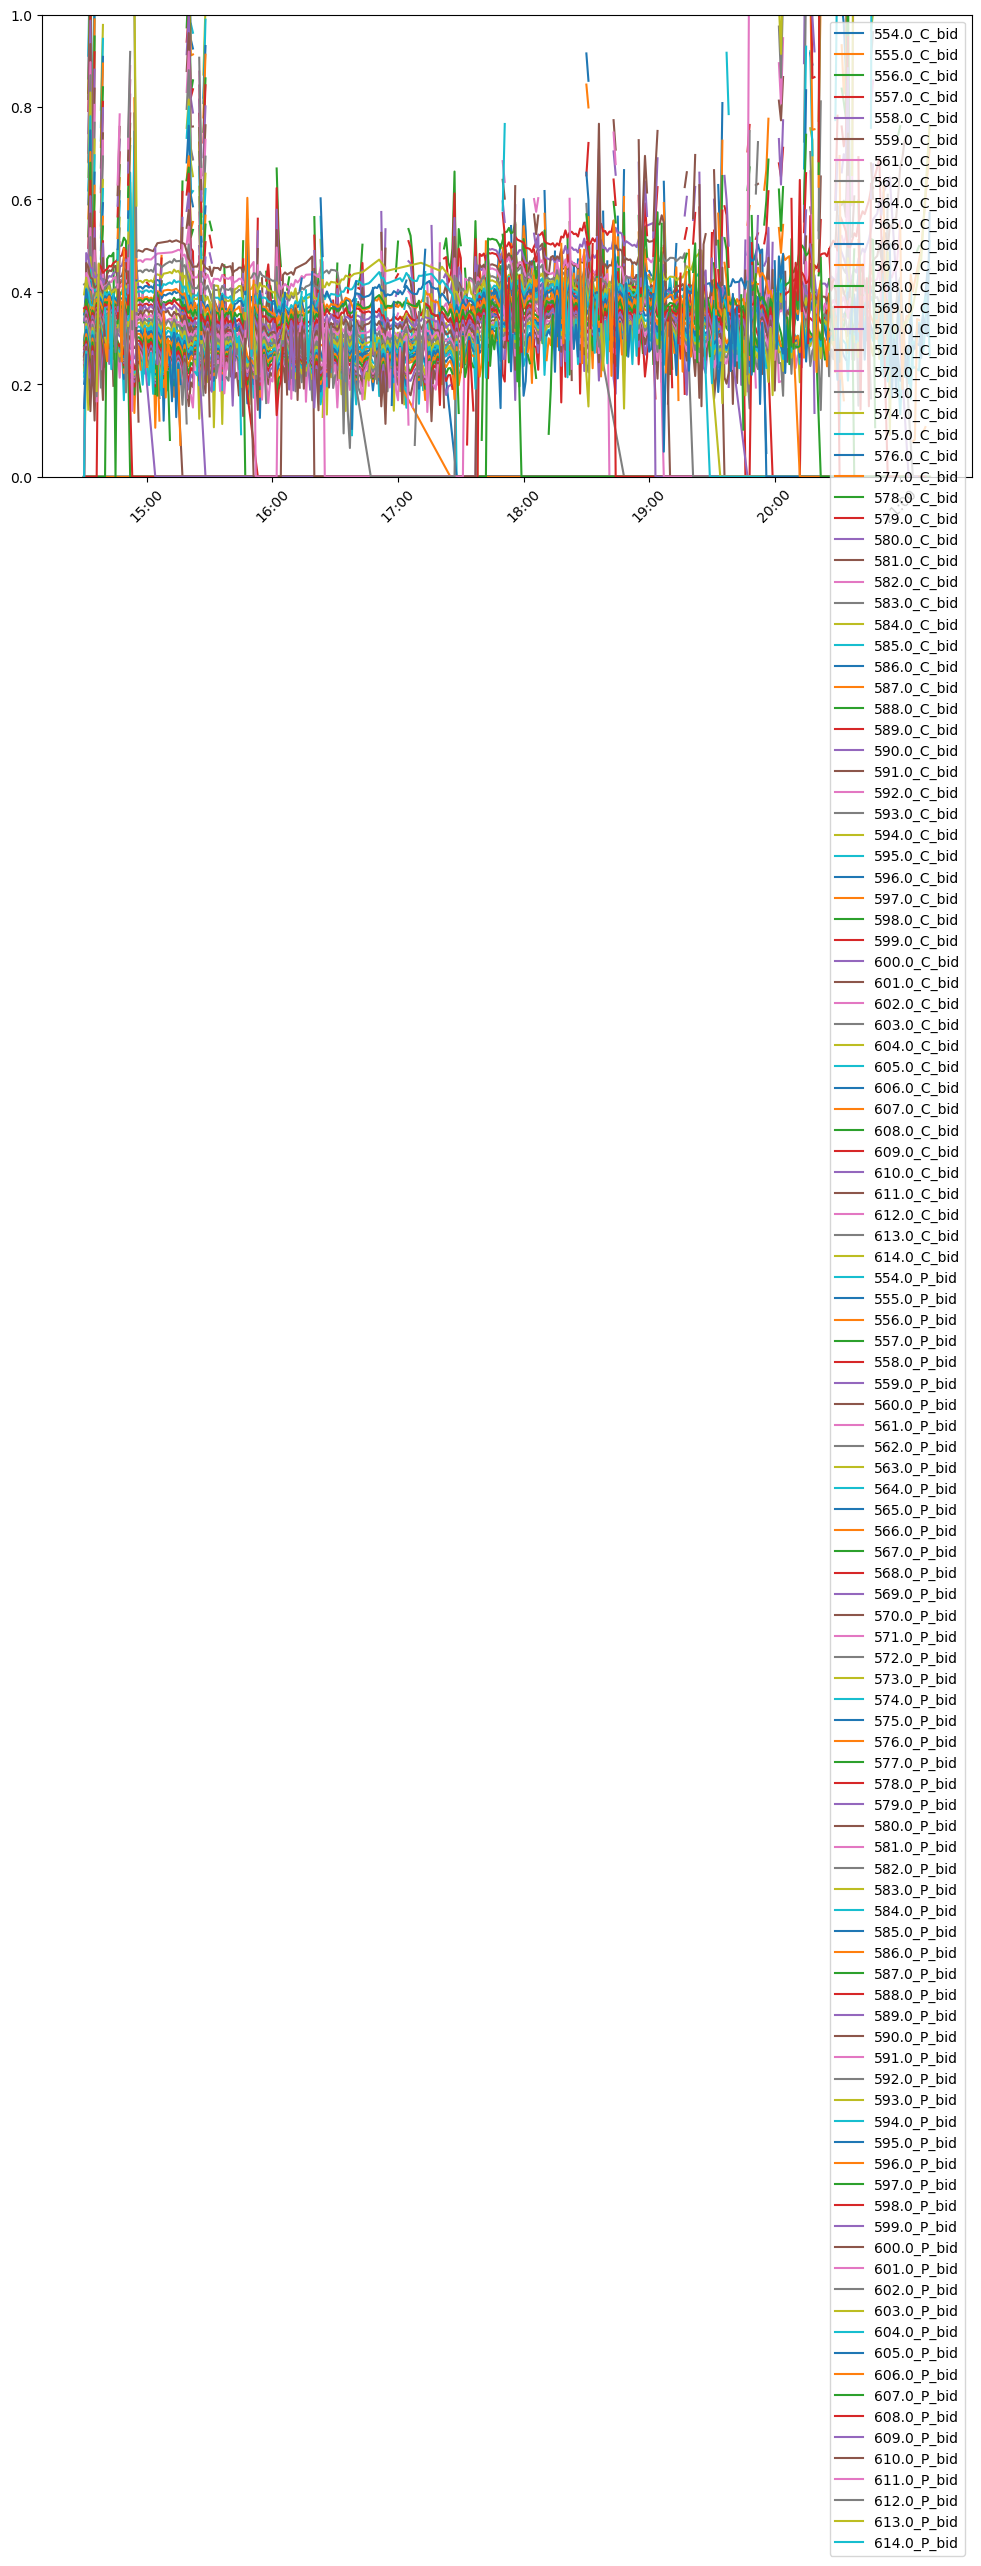

In [60]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(12, 6))

tickers=df["ticker"].unique()
for ticker in tickers:
    df_ticker=df[df["ticker"]==ticker]
    strike=df_ticker["strike"].iloc[0]
    cp=df_ticker["option_type"].iloc[0]
    ax.plot(df_ticker["minute"], df_ticker["bid_iv"], label=f"{strike}_{cp}_bid")
    ax.set_ylim(0, 1)
    ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    plt.xticks(rotation=45) 

plt.legend()
plt.show()


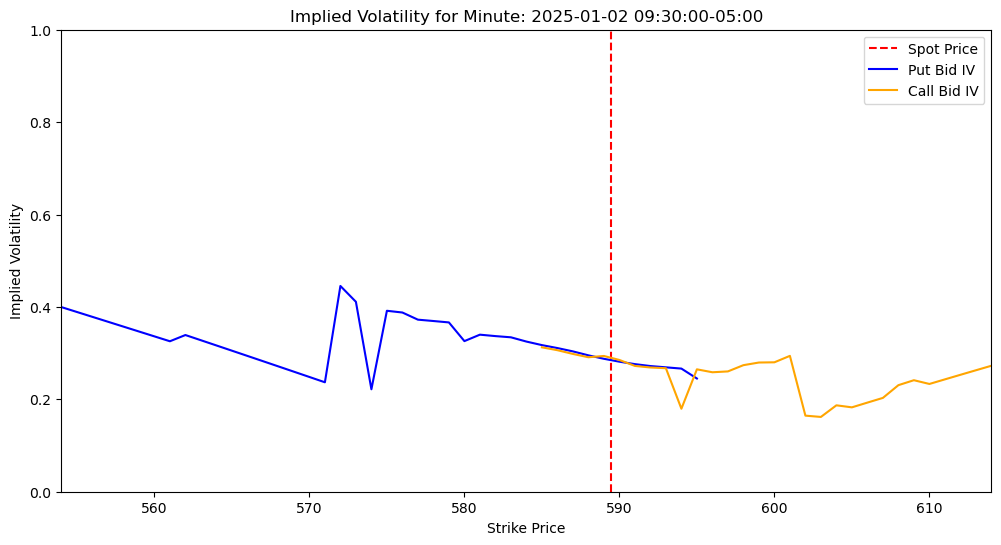

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.animation import FuncAnimation, PillowWriter

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Function to update the plot for each frame
def update(minute):
    ax.clear()
    df_minute = df[df["minute"] == minute]
    df_put = df_minute[df_minute["option_type"] == "P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    spot_val = df_minute["close_price"].iloc[0]
    ax.axvline(x=spot_val, color='red', linestyle='--', label='Spot Price')
    ax.plot(df_put["strike"], df_put["mid_iv"], label='Put Bid IV', color='blue')
    ax.plot(df_call["strike"], df_call["mid_iv"], label='Call Bid IV', color='orange')
    
    ax.set_ylim(0, 1)
    ax.set_xlim(df["strike"].min(), df["strike"].max())
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(f'Implied Volatility for Minute: {minute}')
    ax.legend()

# Create the animation
ani = FuncAnimation(fig, update, frames=sorted(minutes), repeat=False)

# Save the animation as a video file
ani.save("implied_volatility_animation.mp4", writer='ffmpeg', fps=2)

# Display the animation
from IPython.display import Video
Video("implied_volatility_animation.mp4")


In [71]:
minutes = sorted(minutes)

/var/folders/c1/dv7w7b2x49j3spqsxnz6y_sw0000gn/T/ipykernel_49151/3190386154.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(2, 1, 1)
/Applications/anaconda3/envs/ml_env2/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


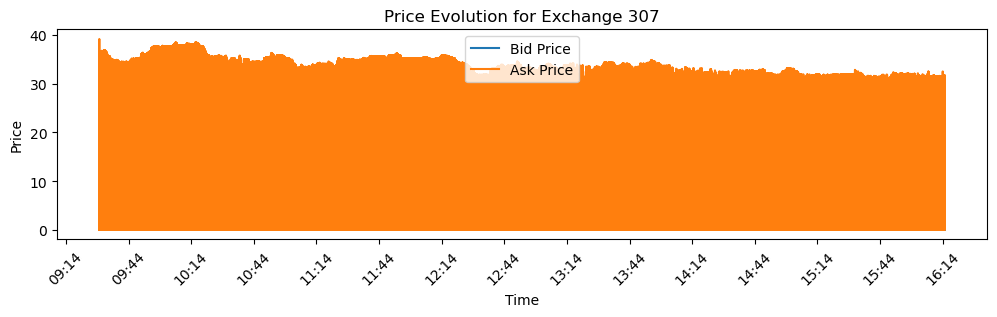

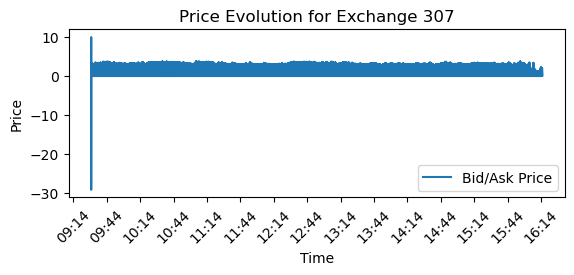

In [19]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
bid_exchange=307
#temp=df_allq[df_allq["bid_exchange"]==bid_exchange]
temp=df_allq
temp_sorted=temp.sort_values(by="timestamp_est")
fig, ax = plt.subplots(figsize=(12, 6))
ax = plt.subplot(2, 1, 1)
ax.plot(temp_sorted["timestamp_est"], temp_sorted["bid_price"], label="Bid Price")
ax.plot(temp_sorted["timestamp_est"], temp_sorted["ask_price"], label="Ask Price")
#ax.plot(temp_sorted["timestamp_est"], temp_sorted["sequence_number"], label="Bid Price")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.set_title(f"Price Evolution for Exchange {bid_exchange}")
ax.legend()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=temp_sorted["timestamp_est"].dt.tz))
plt.xticks(rotation=45)
plt.show()

ax = plt.subplot(2, 1, 2)
diff_bid_ask = temp_sorted["ask_price"] - temp_sorted["bid_price"]
ax.plot(temp_sorted["timestamp_est"], diff_bid_ask, label="Bid/Ask Price")
#ax.plot(temp_sorted["timestamp_est"], temp_sorted["sequence_number"], label="Bid Price")
ax.set_xlabel("Time")
ax.set_ylabel("Price")
ax.set_title(f"Price Evolution for Exchange {bid_exchange}")
ax.legend()
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M", tz=temp_sorted["timestamp_est"].dt.tz))
plt.xticks(rotation=45)
plt.show()

interactive(children=(SelectionSlider(continuous_update=False, description='Minute:', options=(Timestamp('2025…

SelectionSlider(continuous_update=False, description='Minute:', options=(Timestamp('2025-01-02 09:30:00-0500',…

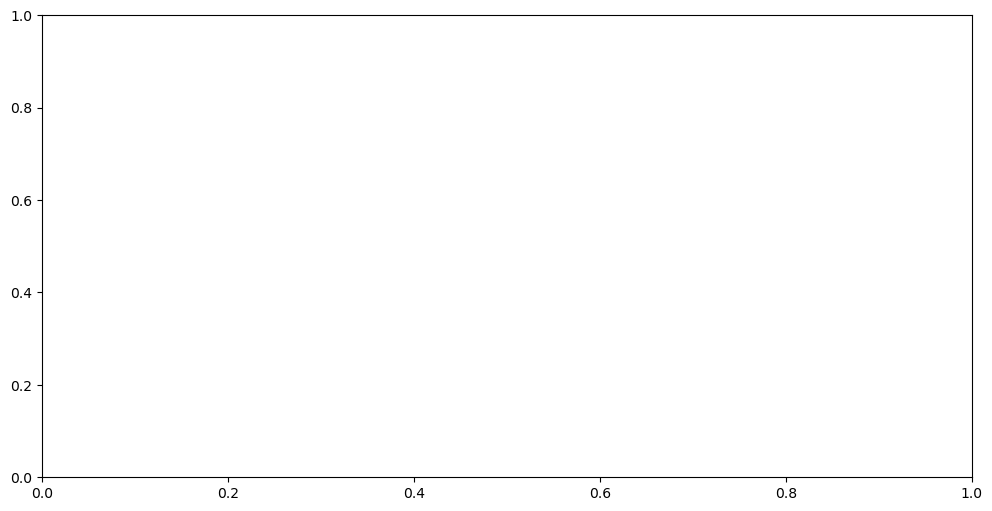

In [62]:
import ipywidgets as widgets
from IPython.display import display

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#fig, ax = plt.subplots(figsize=(12, 6))

minutes=df["minute"].unique()
""""
for minute in minutes:
    df_minute=df[df["minute"]==minute]
    df_put=df_minute[df_minute["option_type"]=="P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    alpha = (minute - minutes.min()) / (minutes.max() - minutes.min())
    ax.plot(df_put["strike"], df_put["bid_iv"], alpha=alpha)
    #ax.plot(df_call["strike"], df_call["bid_iv"], alpha=alpha)
    #ax.plot(df_put["strike"], df_put["bid_iv"], label=f"{minute}_p_bid")
    #ax.plot(df_put["strike"], df_put["bid_iv"]) 
    ax.set_ylim(0, 1)
    #ax.xaxis.set_major_locator(mdates.HourLocator(interval=1))
    #ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    #plt.xticks(rotation=45) 

plt.legend()
"""
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create a slider for selecting the minute
minute_slider = widgets.SelectionSlider(
    options=sorted(minutes),
    description='Minute:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='s'
)

# Function to update the plot based on the selected minute
def update_plot(minute):
    fig, ax = plt.subplots(figsize=(12, 6))
    df_minute = df[df["minute"] == minute]
    df_cboe_minute=df_cboe[df_cboe["minute"]==minute]
    df_cboe_minute=df_cboe_minute[df_cboe_minute["expiration"]=="2025-01-02"]
    df_put = df_minute[df_minute["option_type"] == "P"]
    df_call = df_minute[df_minute["option_type"] == "C"]
    df_cboe_put=df_cboe_minute[df_cboe_minute["option_type"]=="P"]
    df_cboe_call=df_cboe_minute[df_cboe_minute["option_type"]=="C"]

    spot_val = df_minute["close_price"].iloc[0]
    ax.axvline(x=spot_val, color='red', linestyle='--', label='Spot Price')
    ax.plot(df_put["strike"], df_put["mid_iv"], label='Put Bid IV', color='blue')
    ax.plot(df_call["strike"], df_call["mid_iv"], label='Call Bid IV', color='orange')
    ax.plot(df_cboe_put["strike"], df_cboe_put["implied_volatility"], label='Put CBOE IV', color='green')
    ax.plot(df_cboe_call["strike"], df_cboe_call["implied_volatility"], label='Call CBOE IV', color='purple')
    
    ax.set_ylim(0, 1)
    ax.set_xlim(560,620)
    ax.set_xlabel('Strike Price')
    ax.set_ylabel('Implied Volatility')
    ax.set_title(f'Implied Volatility for Minute: {minute}')
    ax.legend()
    
    plt.show()

# Display the slider and the plot
interactive_plot = widgets.interactive(update_plot, minute=minute_slider)
display(interactive_plot)
display(minute_slider)

In [56]:
minute_slider.value
df_cboe["minute"] = pd.to_datetime(df_cboe["quote_datetime"]).dt.tz_localize("US/Eastern").dt.tz_convert("US/Eastern")
df_cboe_minute=df_cboe[df_cboe["minute"]==minute_slider.value]
#minute_slider.value
df_cboe_minute_put=df_cboe_minute[df_cboe_minute["option_type"]=="P"]
df_cboe_minute_call=df_cboe_minute[df_cboe_minute["option_type"]=="C"]
df_cboe_minute2=df_cboe_minute[df_cboe_minute["expiration"]=="2025-01-02"]
df_cboe_minute2_put=df_cboe_minute2[df_cboe_minute2["option_type"]=="P"]
df_cboe_minute2_call=df_cboe_minute2[df_cboe_minute2["option_type"]=="C"]
df_cboe_minute2_put


,underlying_symbol,quote_datetime,root,expiration,strike,option_type,open,high,low,close,...,implied_underlying_price,active_underlying_price,implied_volatility,delta,gamma,theta,vega,rho,open_interest,minute
580,SPY,2025-01-02 12:26:00,SPY,2025-01-02,400.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,5.2782,-0.0003,0.0000,-0.0050,0.0001,0.0000,203,2025-01-02 12:26:00-05:00
1390,SPY,2025-01-02 12:26:00,SPY,2025-01-02,410.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,4.9561,-0.0003,0.0000,-0.0050,0.0002,0.0000,8,2025-01-02 12:26:00-05:00
2200,SPY,2025-01-02 12:26:00,SPY,2025-01-02,420.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,4.6409,-0.0004,0.0000,-0.0050,0.0002,0.0000,70,2025-01-02 12:26:00-05:00
3010,SPY,2025-01-02 12:26:00,SPY,2025-01-02,430.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,4.3322,-0.0004,0.0000,-0.0050,0.0002,0.0000,7,2025-01-02 12:26:00-05:00
3820,SPY,2025-01-02 12:26:00,SPY,2025-01-02,440.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,4.0297,-0.0004,0.0000,-0.0050,0.0002,0.0000,117,2025-01-02 12:26:00-05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86440,SPY,2025-01-02 12:26:00,SPY,2025-01-02,670.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,2.1143,-0.9982,0.0002,-0.0302,0.0005,-0.0006,0,2025-01-02 12:26:00-05:00
87250,SPY,2025-01-02 12:26:00,SPY,2025-01-02,675.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,2.2206,-0.9983,0.0002,-0.0302,0.0005,-0.0006,0,2025-01-02 12:26:00-05:00
88060,SPY,2025-01-02 12:26:00,SPY,2025-01-02,680.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,2.3256,-0.9983,0.0002,-0.0302,0.0005,-0.0006,0,2025-01-02 12:26:00-05:00
88870,SPY,2025-01-02 12:26:00,SPY,2025-01-02,685.0,P,0.0,0.0,0.0,0.0,...,0.0,586.205,3.5492,-0.9771,0.0012,-0.3752,0.0068,-0.0017,0,2025-01-02 12:26:00-05:00


Timestamp('2025-01-02 11:00:00-0500', tz='pytz.FixedOffset(-300)')

In [18]:
df_cboe=pd.read_csv("data/UnderlyingOptionsIntervals_60sec_calcs_oi_2025-01-02.csv")